In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')


In [3]:
#Defining the python dictionary
column_names = {'X1':'Relative_Compactness',
                'X2': 'Surface_Area', 
                'X3': 'Wall_Area',
                'X4': 'Roof_Area', 
                'X5': 'Overall_Height', 
                'X6': 'Orientation', 
                'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 
                'Y2': 'Cooling_Load'}

In [4]:
#Renaming the columns with the .rename method in pandas
df = df.rename(columns=column_names)

In [5]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [8]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [9]:
df.describe(include = 'all')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
#This line selects 15 samples of one independent and one dependent variable
simple_linear_reg_df = df[["Relative_Compactness", 'Cooling_Load']].sample(768, random_state=42)

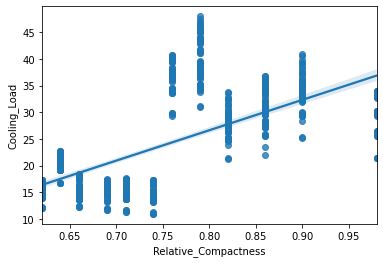

In [11]:
#Regression plot using seaborn (a visualization library)
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

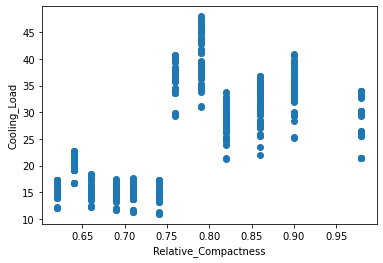

In [12]:
#Regression plot using matplotlib (a visualization library)
plt.scatter(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df, marker = 'o')
plt.xlabel("Relative_Compactness")
plt.ylabel("Cooling_Load")
plt.show()

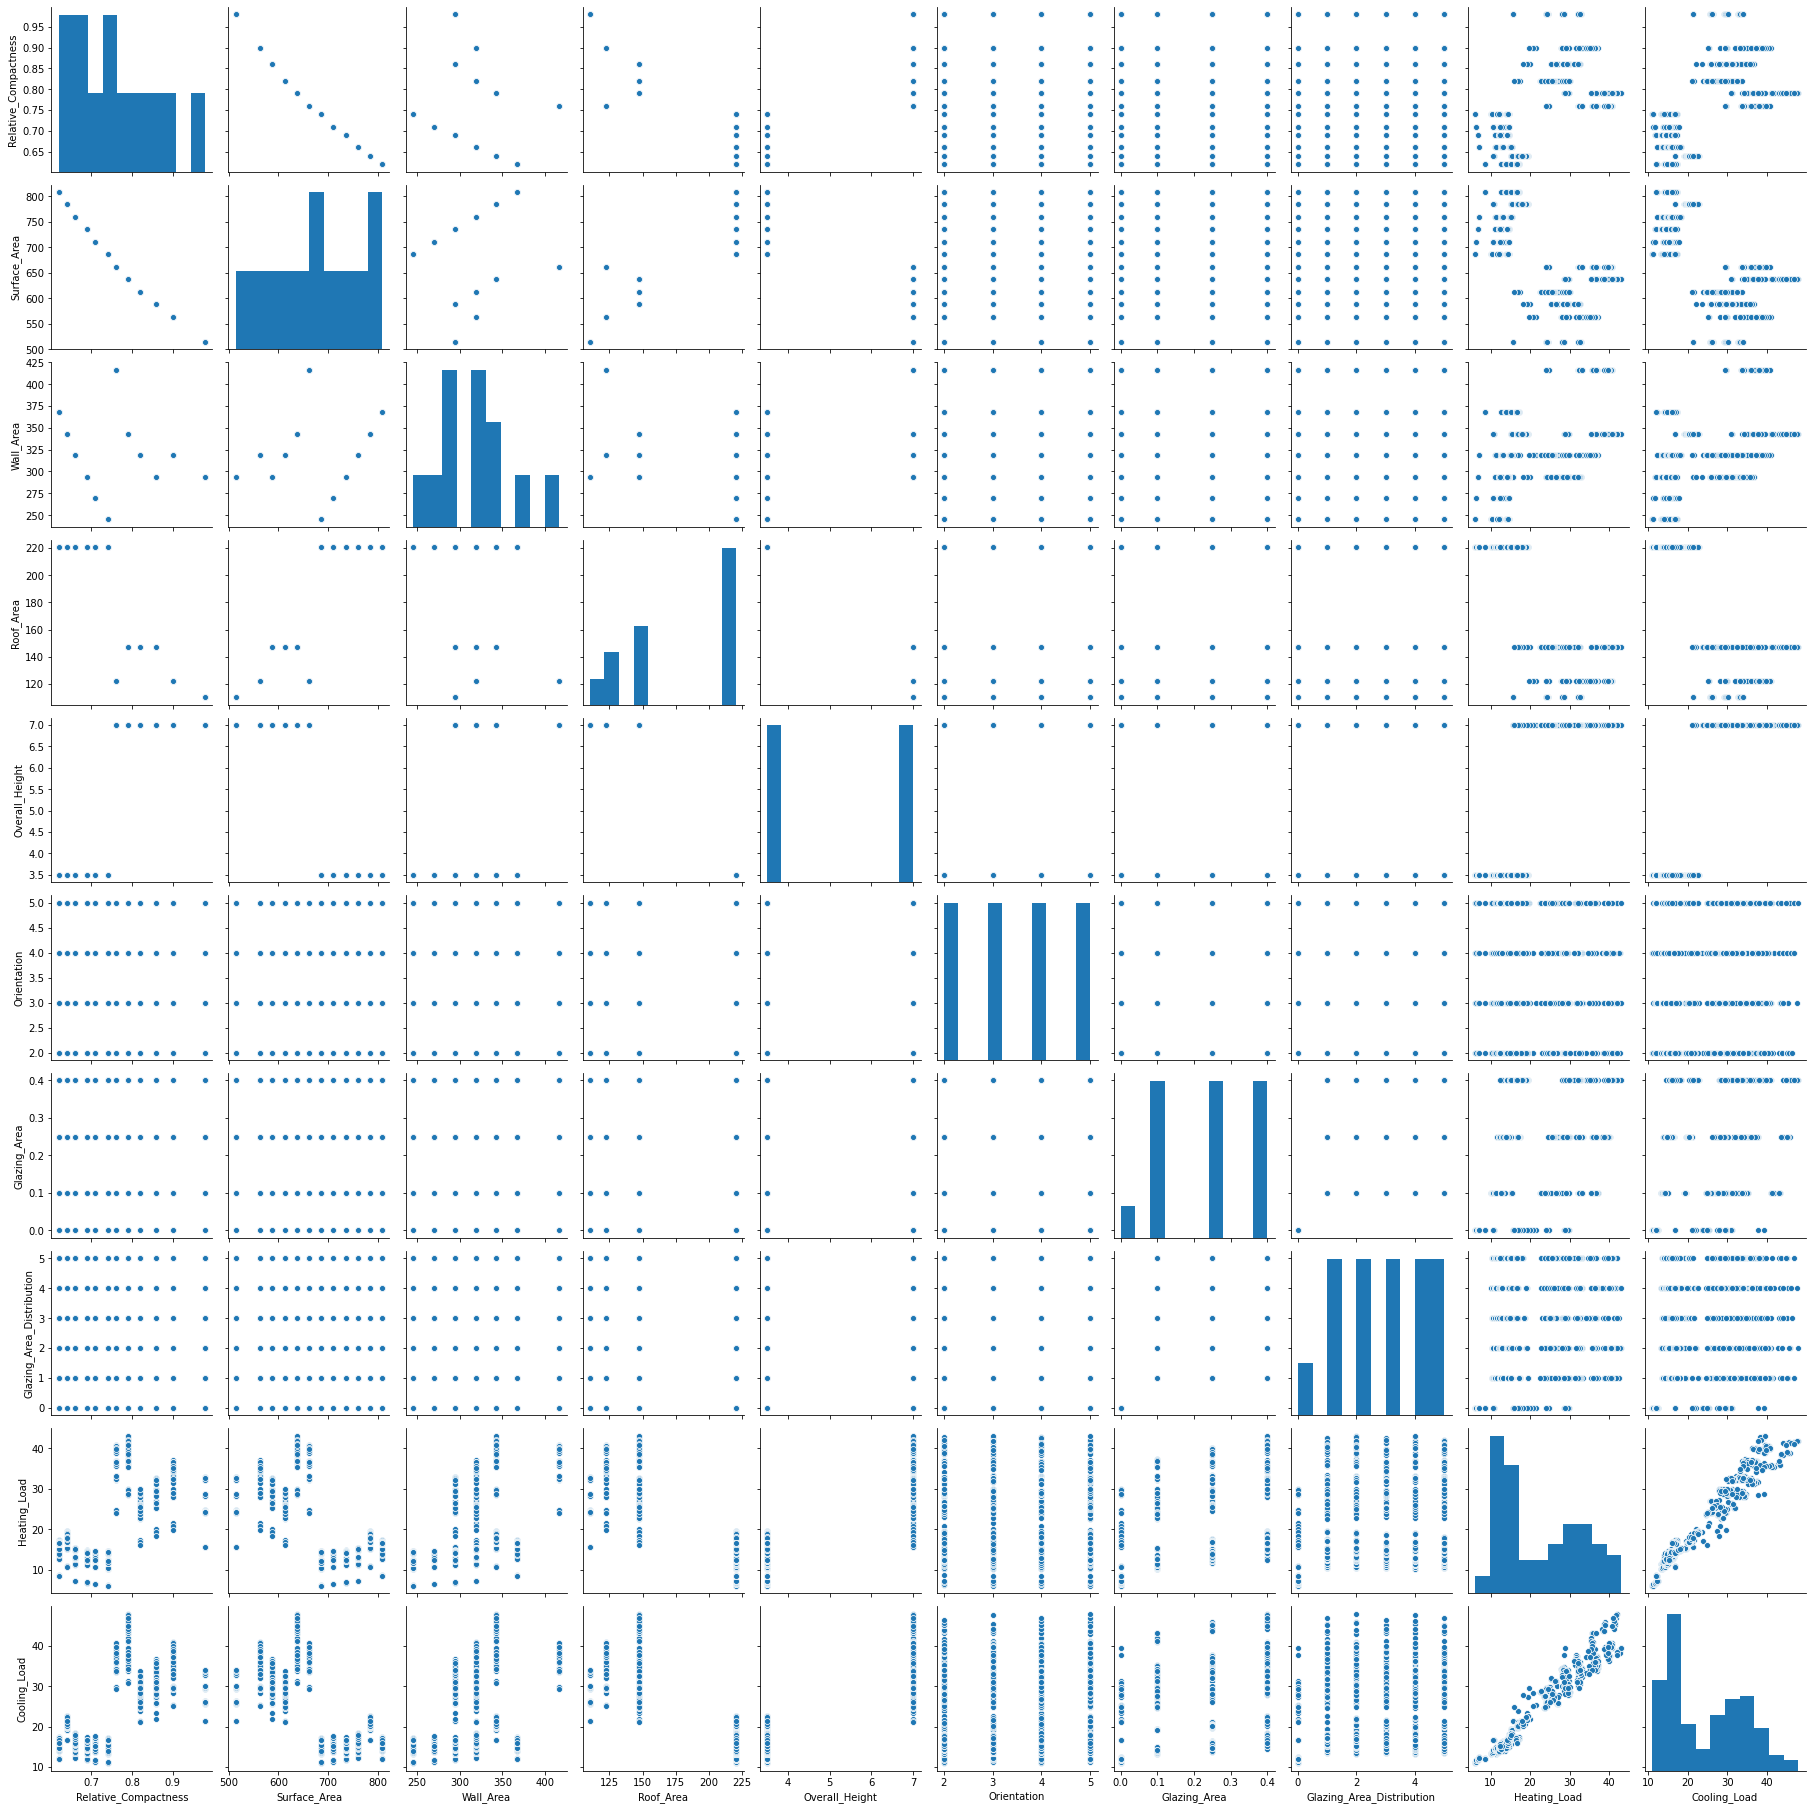

In [13]:
#let do a pairplot to see the distribution and scatter plot of all features
sns.pairplot(df)
plt.show()

In [14]:
# plt.figure()
# sns.pairplot(data=df.drop(df[["Cooling_Load", "Heating_Load"]], axis = 1), dropna=True)
# plt.show()
# plt.savefig("energy_efficiency_pair_plot.png")

### From the regression plot using relative compactiveness and cooling load, we saw their are a lot of outlier or extreme values which and the regression line clearly indicated them. Let see the correlations between the target or response variable(cooling load or heating load) with the features or predictors.

In [15]:
#, 'Heating_Load', 'Cooling_Load'
heating_load_corr =  ['Relative_Compactness', 'Surface_Area',
                      'Wall_Area', 'Roof_Area','Overall_Height', 
                      'Orientation', 'Glazing_Area','Glazing_Area_Distribution','Heating_Load']
df.corrwith(df['Heating_Load']).sort_values(ascending = True)

Roof_Area                   -0.861828
Surface_Area                -0.658120
Orientation                 -0.002587
Glazing_Area_Distribution    0.087368
Glazing_Area                 0.269842
Wall_Area                    0.455671
Relative_Compactness         0.622272
Overall_Height               0.889430
Cooling_Load                 0.975862
Heating_Load                 1.000000
dtype: float64

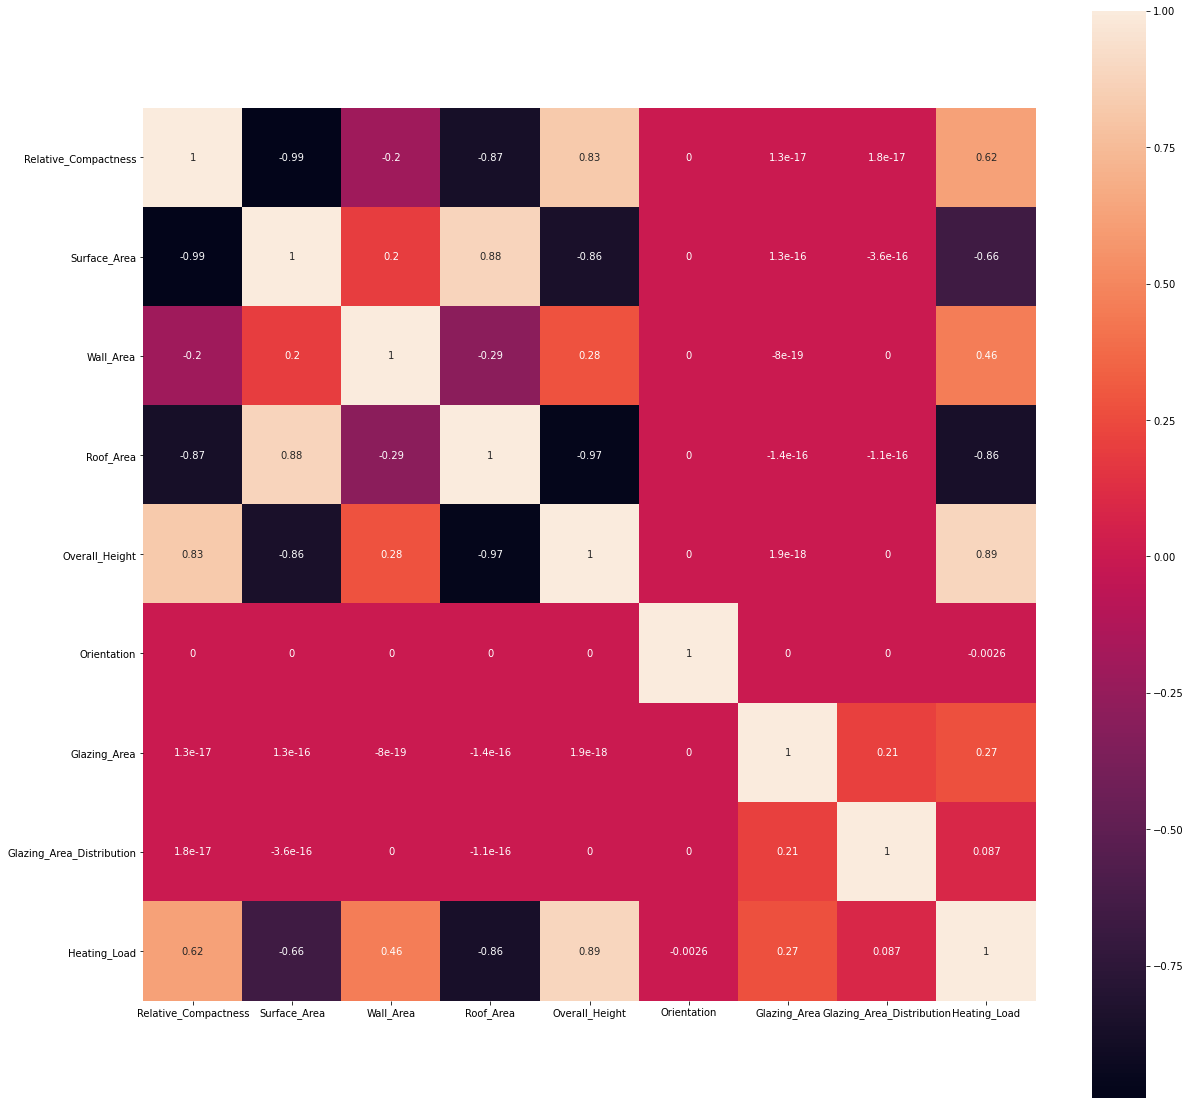

In [16]:
#heatmap for correlation with heating load
fig,ax = plt.subplots(figsize = (20,20))
corr_heating_load = df[heating_load_corr].corr()
sns.heatmap(corr_heating_load, annot = True, square = True)

In [17]:
#IS good we do same for Cooling_Load as well to see the correlations 
cooling_load_corr =  ['Relative_Compactness', 'Surface_Area',
                      'Wall_Area', 'Roof_Area','Overall_Height', 
                      'Orientation', 'Glazing_Area','Glazing_Area_Distribution','Cooling_Load']
df.corrwith(df['Cooling_Load']).sort_values(ascending = True)

Roof_Area                   -0.862547
Surface_Area                -0.672999
Orientation                  0.014290
Glazing_Area_Distribution    0.050525
Glazing_Area                 0.207505
Wall_Area                    0.427117
Relative_Compactness         0.634339
Overall_Height               0.895785
Heating_Load                 0.975862
Cooling_Load                 1.000000
dtype: float64

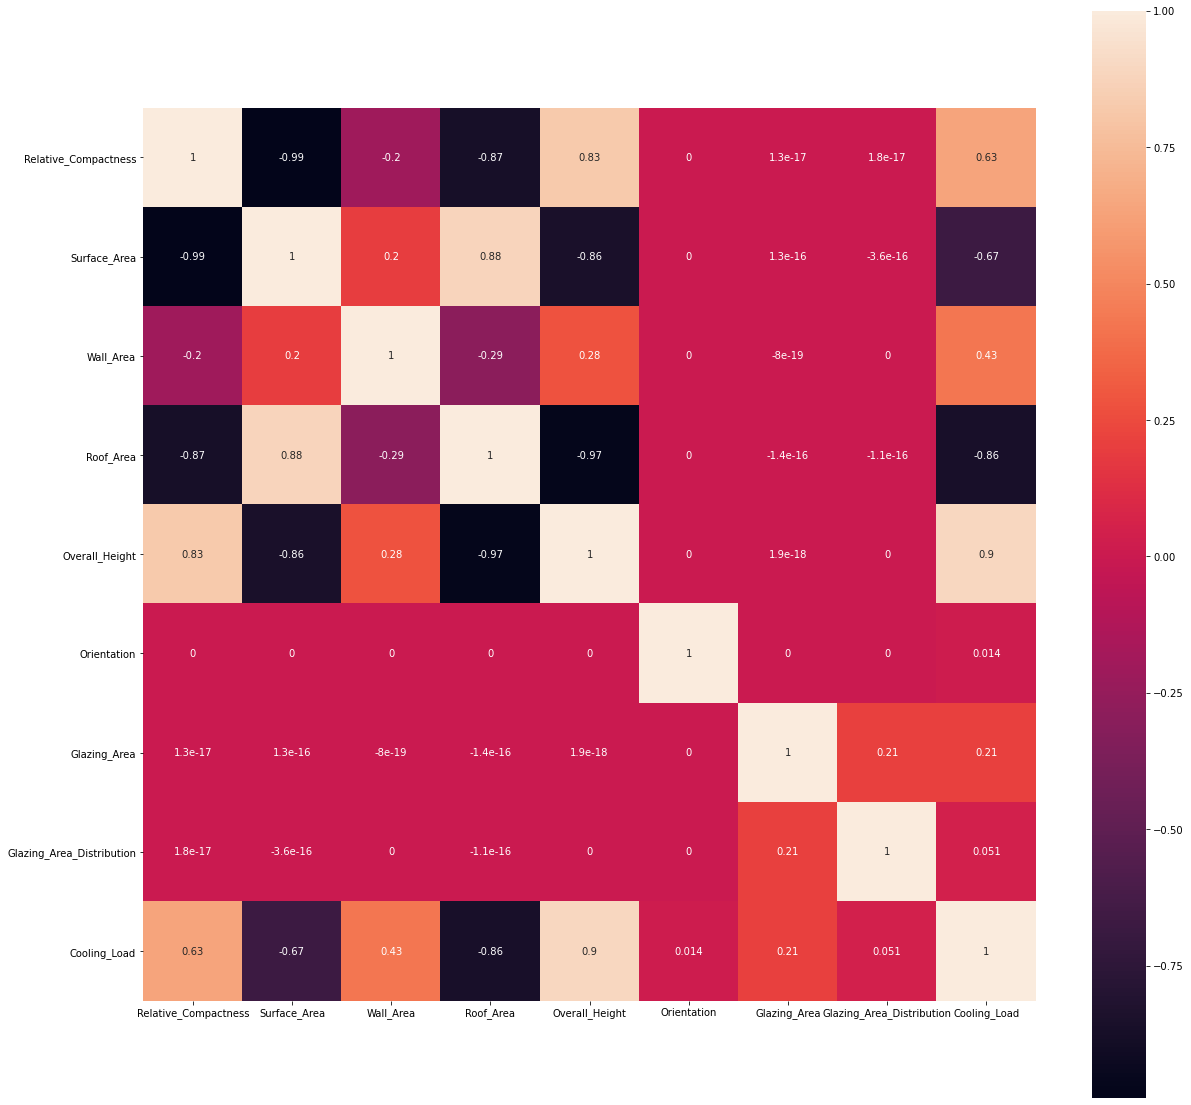

In [18]:
#heatmap for correlation with cooling load
fig,ax = plt.subplots(figsize = (20,20))
corr_cooling_load = df[cooling_load_corr].corr()
sns.heatmap(corr_cooling_load, annot = True, square = True)

### CREATING A DUMMY DATASET USING SKLEARN MAKE_REGRESSION MODULE

To compare our dataset with the dummy dataset used in the tutorial, it will be good we create our own dummy dataset to follow accordingly with the tutorial.The original dataset we are working with has 768 number of samples with 8 columns or features or predictors. It will be a best practice if we create a dummy dataset with same shape. We are going to use sklearn make regression module with <b>noise of 5.</b> The dummy dataset will create Y that is our response variable automatically and as such we will rename it to have same predictor(X) names like our main dataset. 

In [19]:
from sklearn.datasets import make_regression
X_predictor, Y_predicate = make_regression(n_features=8, n_samples=768, noise = 5, random_state=42)

#let convert is to a dataframe
dummy_dataset = pd.DataFrame(X_predictor, Y_predicate)
#let reset the index
dummy_dataset.reset_index()
print('The shape of our dummy dataset is:',dummy_dataset.shape)
dummy_dataset.head()

The shape of our dummy dataset is: (768, 8)


,0,1,2,3,4,5,6,7
-27.068070,0.260322,1.392465,-1.748532,-0.250047,0.793489,0.288694,0.810808,-0.134309
307.128333,1.058729,0.012499,-0.733156,2.868403,0.441307,-1.668599,0.771920,-0.172802
-8.012010,0.472002,-0.580053,-1.237662,0.239405,0.482249,0.499685,0.742682,0.075955
-8.927997,0.367366,-0.877983,-0.271124,-0.826880,1.492689,-0.226479,-0.803179,0.913585
-26.948031,1.355638,0.756989,-1.244655,-0.922165,-0.773789,0.869606,1.876796,0.413435


#### Let rename our dummy dataset columns to have same like our real dataset

In [20]:
dummy_columns = {0 :'Relative_Compactness',
                1: 'Surface_Area', 
                2: 'Wall_Area',
                3: 'Roof_Area', 
                4: 'Overall_Height', 
                5: 'Orientation', 
                6: 'Glazing_Area', 
                7: 'Glazing_Area_Distribution'}

In [21]:
dummy_dataset = dummy_dataset.rename(columns=dummy_columns)
dummy_dataset.head()
#Y is autogenerated and since we have 2 response variable, Y can be Cooling_Load or Heating_Load. You can choose 
#anyone but we will use the one choosen during the lecture which is Cooling_Load

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
-27.068070,0.260322,1.392465,-1.748532,-0.250047,0.793489,0.288694,0.810808,-0.134309
307.128333,1.058729,0.012499,-0.733156,2.868403,0.441307,-1.668599,0.771920,-0.172802
-8.012010,0.472002,-0.580053,-1.237662,0.239405,0.482249,0.499685,0.742682,0.075955
-8.927997,0.367366,-0.877983,-0.271124,-0.826880,1.492689,-0.226479,-0.803179,0.913585
-26.948031,1.355638,0.756989,-1.244655,-0.922165,-0.773789,0.869606,1.876796,0.413435


### Collinearity and Assumptions for Linear Regression

For better understanding, we explain the assumptions made by linear regression by comparing results on our energy efficiency dataset and a dummy linear dataset generated to have similar shape (same number of rows and column) as the energy efficiency dataset. Some assumptions made by linear regression models about the data are:

1. Linearity: The relationship between the variables is linear such that a straight line is the line of best fit.From the regression plots above, we can see that the residuals of the dummy data are spread across the regression line as they should be to meet the linearity assumption unlike the residuals of the energy efficiency dataset which are a bit farther from the regression line.


####   To observe assumption well as seen in the tutorial, is good we split our dataset and make a simple regression model

In [22]:
from sklearn.model_selection import train_test_split # to split the data
from sklearn.linear_model import LinearRegression #the model used, it is used for single and multivaraiate

X =  df[['Relative_Compactness']] #chosen predictor
y=  df[['Heating_Load']] #target variable, you can set multiple predictors or target varaiables

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

LR = LinearRegression()
LR.fit(X_train, y_train)

Y_pred= LR.predict(X_test) # the predicted vriable
print(Y_pred[:10])

[[13.65652995]
 [16.0375964 ]
 [35.08612796]
 [23.77606234]
 [14.84706318]
 [25.56186218]
 [35.08612796]
 [35.08612796]
 [14.84706318]
 [30.32399507]]


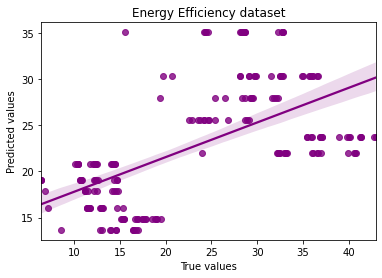

In [23]:
#let do a regplot for the True value and predicted values for energy efficiency dataset
sns.regplot(x = y_test, y = Y_pred, color= 'purple')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Energy Efficiency dataset')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split # to split the data
from sklearn.linear_model import LinearRegression #the model used, it is used for single and multivaraiate

XD =  dummy_dataset[['Relative_Compactness']] #chosen predictor
yd =  Y_predicate #target variable, you can set multiple predictors or target varaiables

X_trainD,X_testD,y_trainD,y_testD = train_test_split(XD,yd,test_size=0.25,random_state = 42)

LRD = LinearRegression()
LRD.fit(X_trainD, y_trainD)

Y_predD = LRD.predict(X_testD) # the predicted vriable
print(Y_pred[:5])

[[13.65652995]
 [16.0375964 ]
 [35.08612796]
 [23.77606234]
 [14.84706318]]


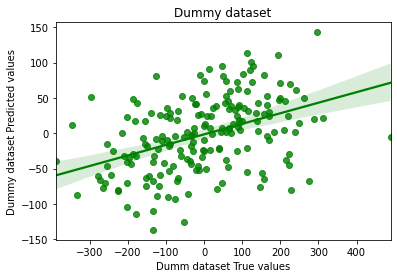

In [25]:
#let do a regplot for the True value and predicted values for dummy dataset
sns.regplot(x = y_testD, y = Y_predD, color= 'green')
plt.xlabel('Dumm dataset True values')
plt.ylabel('Dummy dataset Predicted values')
plt.title('Dummy dataset')
plt.show()

#### ASSUMPTION 2
2. Homoscedasticity: The residuals or prediction errors are of equal or constant variance.
The variance of the residuals for the dummy dataset appear to be uniform as opposed to the energy efficiency dataset which violates this assumption.

Text(0.5, 1.0, 'Energy efficiency dataset')

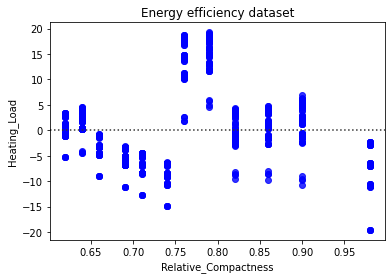

In [26]:
#let visualize this using residual plot in sns
sns.residplot(x = X, y = y, color= 'blue', data = df)
plt.title('Energy efficiency dataset')

Text(0.5, 1.0, 'Dummy dataset')

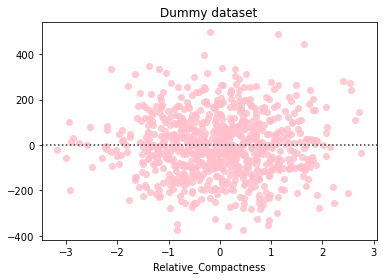

In [27]:
#Let do residual plot for our dummy dataset. As expected, our dummy dataset obeyed assumption 2 unlike our energy efficiency 
#dataset
sns.residplot(x = XD, y = yd, data = dummy_dataset, color='pink')
plt.title('Dummy dataset')

### ASSUMPTION 3
3. Normality: The residuals are of a normal distribution.
The energy efficiency dataset flouts this assumption as the residuals are clearly not normally distributed while the dummy dataset has normally distributed residuals with the mean and median at 0. 


Text(0.5, 1.0, 'Energy efficiency dataset')

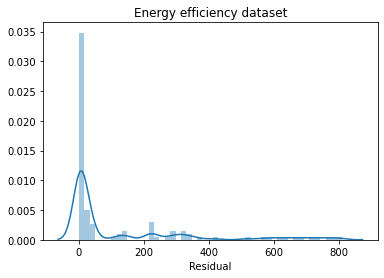

In [28]:
#let do a distplot from sns to visualize this assumption
sns.distplot(df)
plt.xlabel('Residual')
plt.title('Energy efficiency dataset')

Text(0.5, 1.0, 'Dummy dataset')

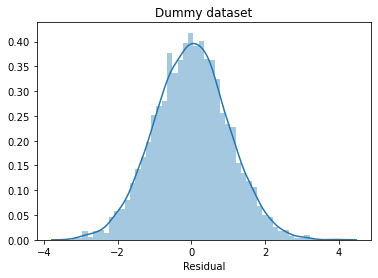

In [29]:
sns.distplot(dummy_dataset)
plt.xlabel('Residual')
plt.title('Dummy dataset')

#### We can also visualize the distribution of the predictions between energy dataset and dummy dataset

##### Residuals
The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

Residual = Observed value - Predicted value
e = y - ŷ

Both the sum and the mean of the residuals are equal to zero. That is, Σ e = 0 and e = 0.

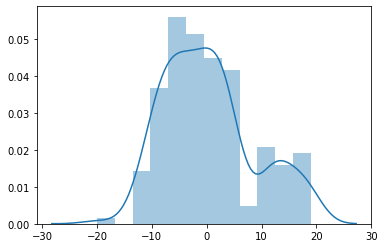

In [30]:
#FOR ENERGY DATASET
floored_1 = pd.DataFrame(np.floor(y_test))
floored_2 = pd.DataFrame(np.floor(Y_pred))
floored_1.reset_index(drop=True,inplace=True)
floor = floored_1["Heating_Load"]-floored_2[0]
sns.distplot(floor)

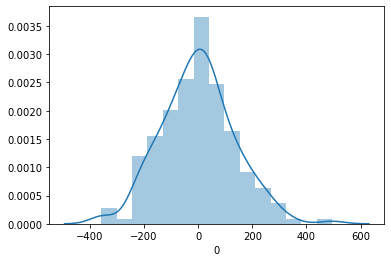

In [31]:
#FOR DUMMY DATASET
floored_3 = pd.DataFrame(np.floor(y_testD))
floored_4 = pd.DataFrame(np.floor(Y_predD))
floored_3.reset_index(drop=True,inplace=True)
floored_dummy = floored_3[0]-floored_4[0]
sns.distplot(floored_dummy)

#### ASSUMPTION 4
4. Independence of the observations

In multiple linear regression where there are more predictors, it is assumed that these variables are independent of each other without any strong correlation between them.The energy efficiency dataset shows a strong correlation between relative compactness and surface area, relative compactness and overall height, surface area and roof area while the variables in the dummy dataset are seen to be independent of each other.

Overall, before inferences are drawn from a linear regression model, all the assumptions discussed above must have been met.

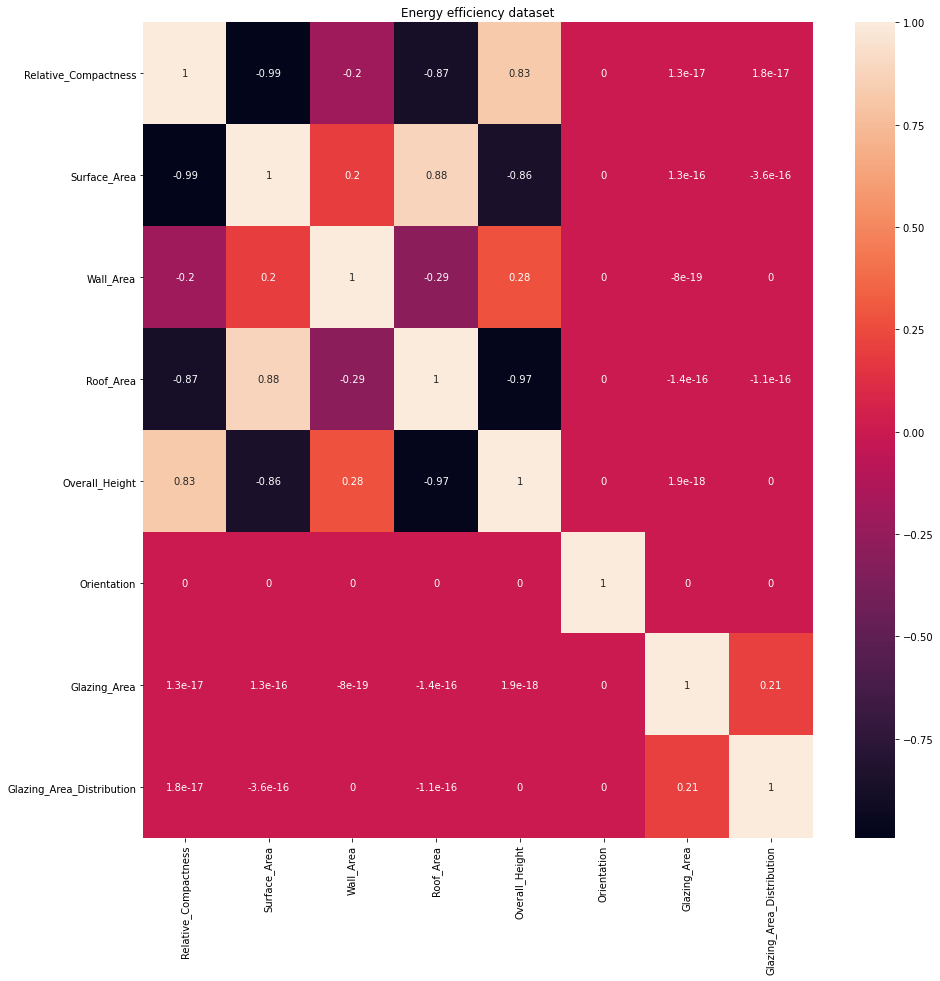

In [32]:
df_drop = df.drop(["Cooling_Load","Heating_Load"],axis=1) #removing the target variable so observe
#the relationship between predictors
fig, ax = plt.subplots(figsize = (15,15))
plt.title('Energy efficiency dataset')
sns.heatmap(df_drop.corr(),annot=True)

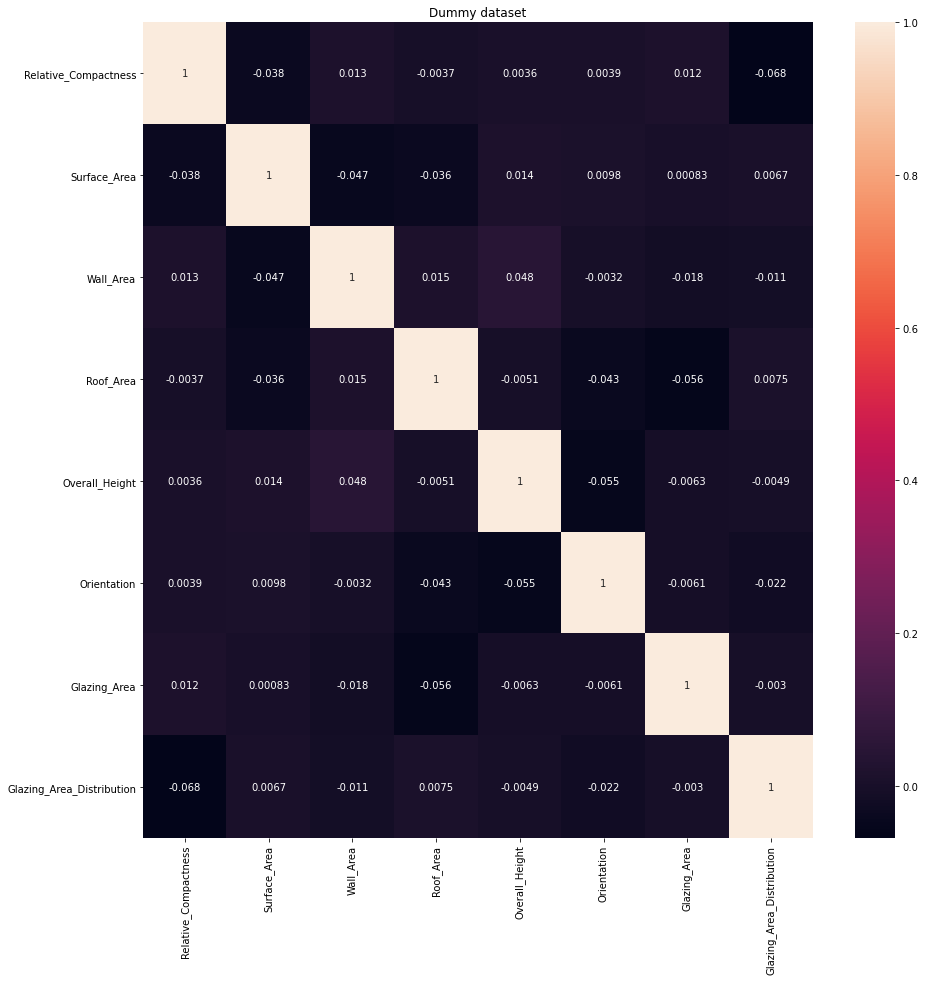

In [33]:
#the relationship between predictors
fig, ax = plt.subplots(figsize = (15,15))
plt.title('Dummy dataset')
sns.heatmap(dummy_dataset.corr(),annot=True)

##### Residual sum of squares and minimizing the cost function

A cost function is a measure of the performance of a model i.e. how far or close the predicted values are to the real values. The objective is to minimise the cost function in order for the model to continuously learn to obtain better results. In linear regression, the cost function can be defined as the sum of squared errors in a training set. The squares of the residuals are taken to penalise errors farther from the line of best fit more than those closer to the line and obtain the best parameter values. 

##### Gradient descent and coordinate descent algorithm

Gradient descent is an optimization algorithm that minimizes a cost function by specifying the direction to move towards to obtain a local or global minima. This is done by initially starting with random values then iteratively updating the values until the minimum cost is obtained.  A learning rate is usually chosen to determine the step size to be taken for each iteration. It is important to carefully select this parameter because, if a small step is chosen, it will take a long time to converge to the minimum cost while if too large, it can result in an overshoot surpassing the location of the minimum cost.

## LESSON 2: MULTIPLE LINEAR REGRESSION

Unlike simple linear regression, multiple linear regression establishes the relationship between the response variable and the predictors (usually two or more). In reality, several factors contribute to a certain outcome as opposed to just one as suggested by simple linear regression. Multiple linear regression has similar assumptions as simple linear regression and also assumes that there is no significant correlation between the predictors. While the relationship between variables can be linear, it allows for non-linear relationships that are not straight lines.

Y= 𝜃0 + 𝜃1X1 + 𝜃2X2 + . . .  +  𝜃nXn + ɛ

##### Collinearity 

Correlation is a measure used to describe the linear relationship between two variables. Correlation values range from -1 for a perfect negative correlation (an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together). A correlation value of 0 indicates that there is absolutely no correlation between both variables. A situation where two or more of the predictors have a strong correlation is known as multicollinearity. Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable. In addition, not all the predictors included are relevant in obtaining better results from the model. Adding more independent variables to the model is not always better instead, it might only make the model more complicated. To resolve this, one of the correlated predictors is selected and the other removed from the data.

##### Polynomial Regression

A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable. It can be represented as Y= 𝜃0 + 𝜃1X + 𝜃2X2 + . . .  +  𝜃nXn + ɛ, for a single independent variable where n is the degree of the polynomial and Y is a linear function of 𝜃. Depending on the task and data, there might be multiple predictors in a polynomial regression model which results in more interactions in the model. As expected, the complexity in the model increases as the degree increases. The goal of polynomial regression is to model a non-linear relationship between the independent and dependent variables (technically, between the independent variable and the conditional mean of the dependent variable). In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.sklearn link on polynomial regression http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

###### - Coefficients of multiple linear regression
A regression coefficient in multiple regression is the slope of the linear relationship between the criterion variable and the part of a predictor variable that is independent of all other predictor variables. The regression coefficient is slope and intercepts.

###### - General notations
Y = mX + b <br>
where m = slope
<br> b = intercept
###### AKA Interaction Effect (Synergy)
This involves creating new feature that would that are a result of the multiplication or dvision of new feature that may have a stronger effect on the tardet variable, we will know the effect when measuring the Regression Performance, this should be done carefully with every step of the way to ensure that you dont add a new feature that can damage your model, I will test this out in the next lesson. The interaction effect can also be liken to feature engineering.

### LESSON 3: Measuring Regression Performance

### Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)
How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate metric to evaluate the performance. In this section, we discuss some examples of metrics used in evaluating regression models such as RSS, R-Squared, RMSE and MAE


###### Let implement the  model evaluation metrics using our energy efficiency dataset. But before then we need to normalize our data. We are going to normalize using MinMaxScaler

In [34]:
#Let do some feature engineering to see interaction effect
df["interaction"] = df["Overall_Height"]*df["Relative_Compactness"]
#creating a new feature

In [35]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
print(predicted_values[:5])


[0.21183934 0.56207796 0.72245532 0.73064864 0.74099641]


##### Mean Absolute Error (MAE)
MAE  is easy and intuitive such that it calculates the sum of the  average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers.
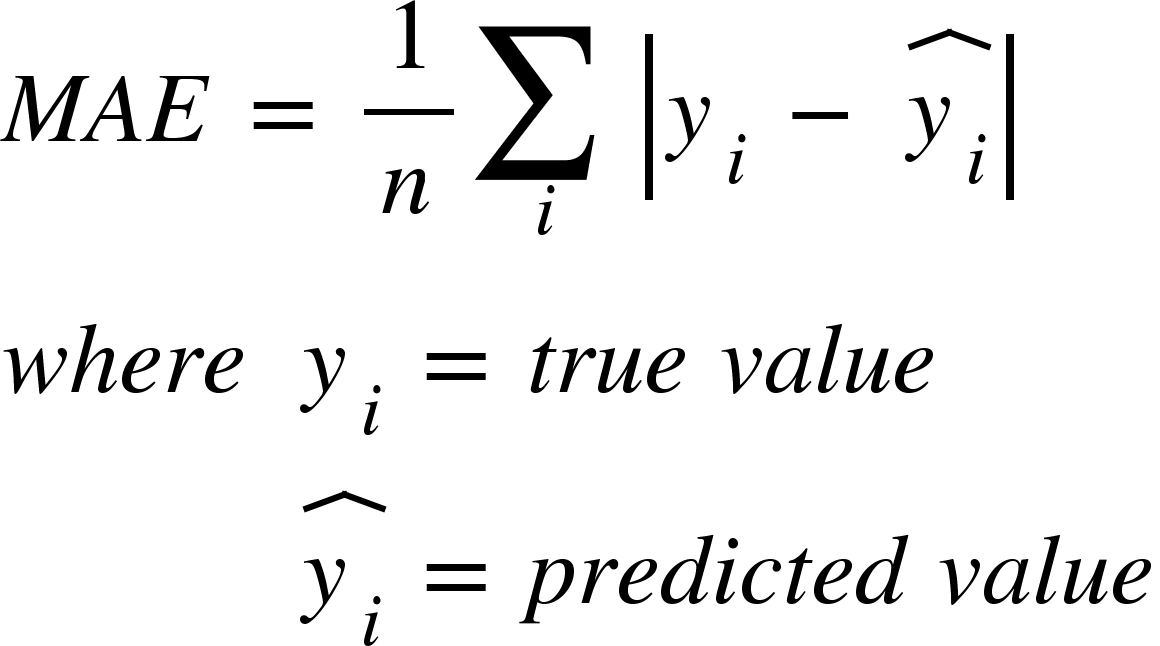

In [36]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063

0.063

##### Residual Sum of Squares (RSS)
Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.
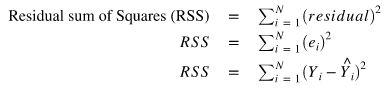

In [37]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)   #prints 1.823

1.637

##### Root Mean Square Error (RMSE)
This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. It describes the spread of the residuals from the line of best fit and the noise in the model. When the RMSE is low, it means that the error made by the model has a small deviation from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observations.
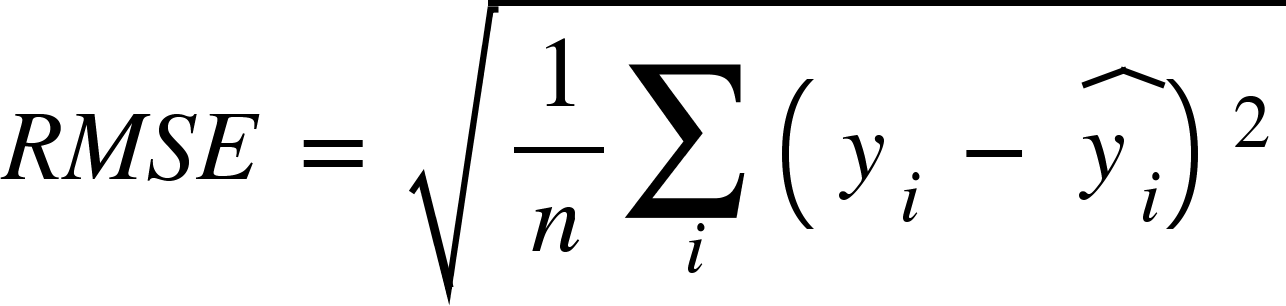

In [38]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	#prints 0.089

0.084

##### R-Squared 
Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.
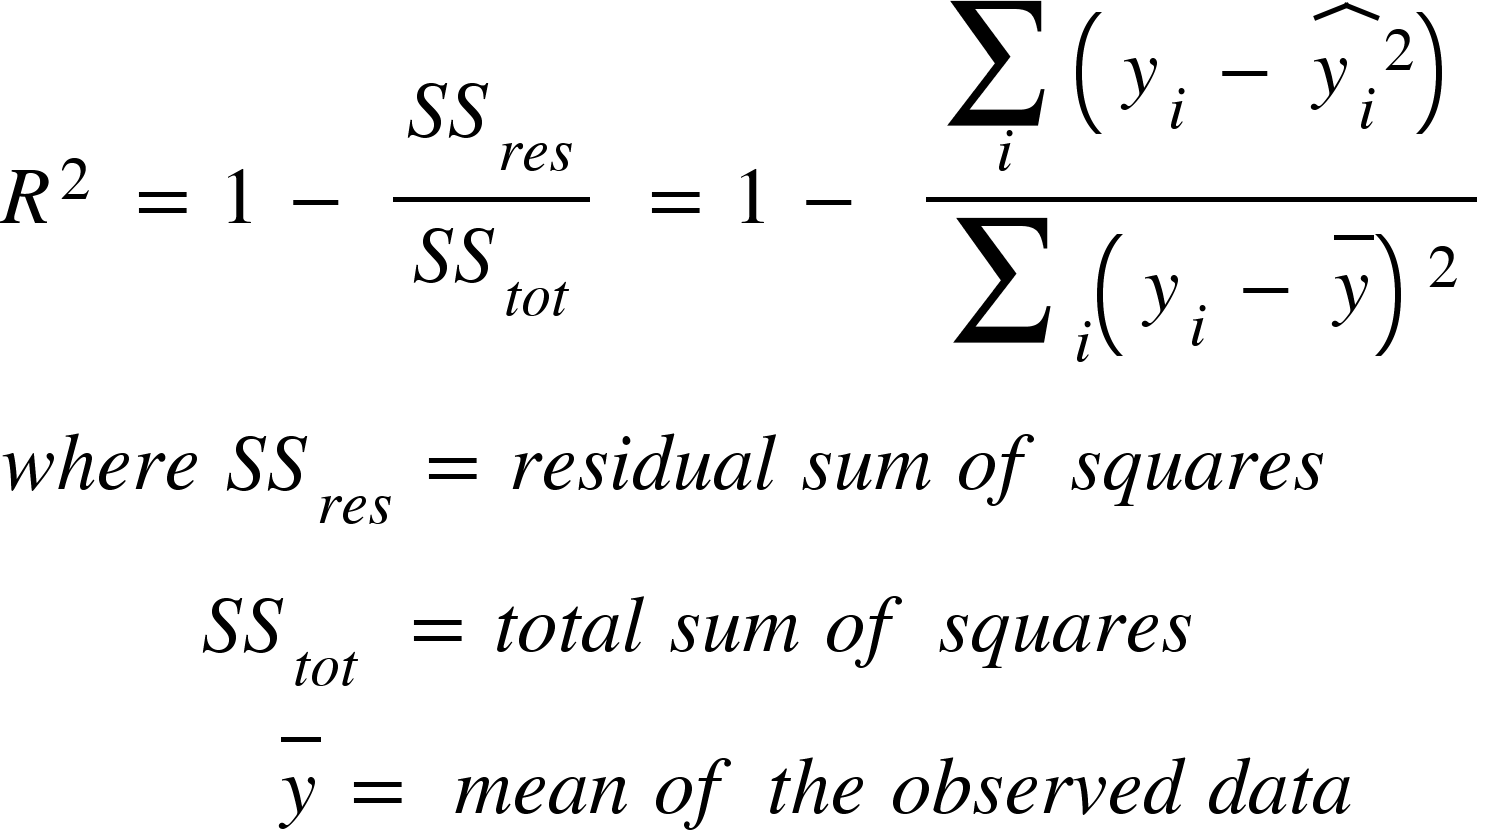


In [39]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)	#prints 0.893

0.904

#### Model complexity, Underfitting and Overfitting
Model complexity refers to the number of input features used to train a model and the algorithmic learning complexity. An overly complex model can be difficult <b>to interpret, prone to overfitting and also require more computing.</b> When creating models, it is imperative for the model to generalise well enough to make reasonable predictions on new and unseen data. An overfit model will perform well on the training data and poorly on unseen data. While a model is required to learn the actual relationship of the variables in the training set, <b>an overfit model memorises the training set, fits the noise, outliers and irrelevant information, then makes predictions based on this noise which is incorrect.</b> On the other hand, when a model is too simple, it can be as a result of having very few features not sufficient enough to learn details and relationships in the data.  In a later section, we will discuss methods that can be used to achieve optimal and acceptable <b>model complexities while avoiding overfitting and underfitting.</b> 

#### The Bias-Variance tradeoff
Bias and variance are common occurrences in machine learning and there is a constant struggle to achieve low bias and variance. Bias is a measure of correctness of a model i.e. how far off is a model from being correct? While high bias results in an increase in the error by making assumptions which prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents underfitting by capturing important relationships. On the other hand, variance tells how much the values estimated by a model will vary across different training data. When the variance is low, it means that there is only a small change in the estimate of the model with  new training  data. A high variance causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt patterns from one training data such that it cannot generalise to other training sets. While it is essential to obtain low bias and low variance, it is almost impossible to achieve this simultaneously which is where the ‘bias-variance tradeoff’ occurs. 

<b>Since is our interest to have low bias and low variance but this seems impossible to achieve simultaneously, we can have a trade where we assert that bias<sup>2</sup> is equal to variance as shown in the plot below. At this point of intersection, we habe optimum model complexity and good model performance and also our erro is minimum at that point.
    
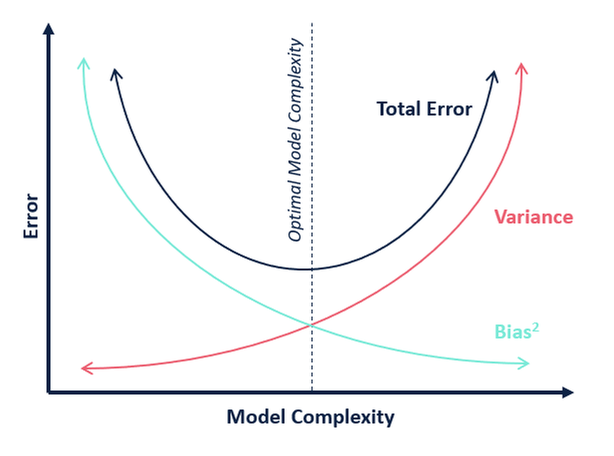

### LESSON 4: Penalization Methods

##### Regulating over- and under-fitting
Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model. Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.

##### Ridge Regression
Also known as L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them. The shrinkage prevents overfitting caused by the complexity of the model or  collinearity. It includes the square magnitude of the coefficients to the loss function as the penalty term.  If the error is defined as the square of residual, when a L2 regularization term is added, the  result is the equation below.
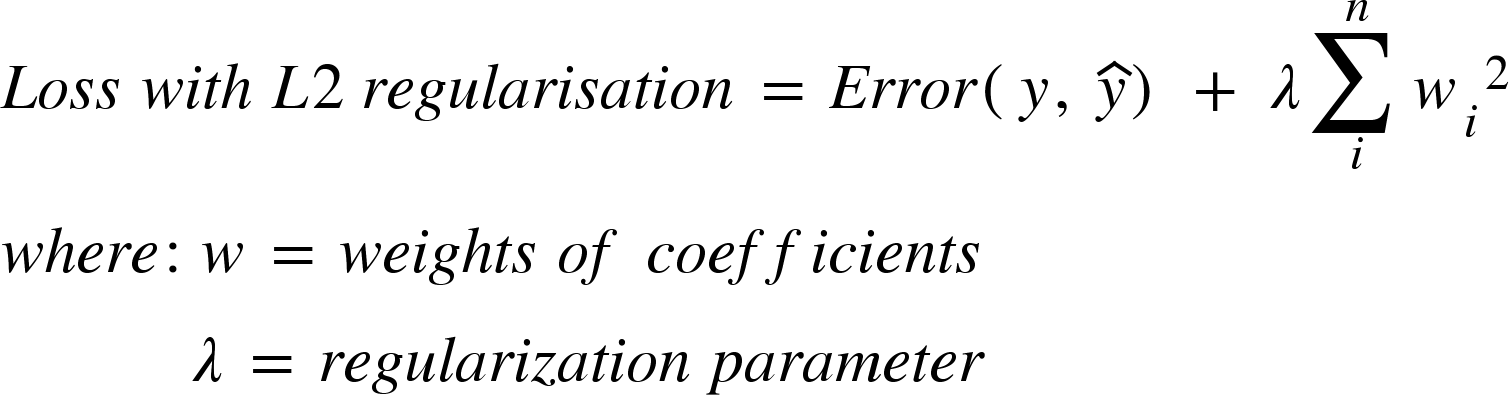

As lambda increases, the penalty increases causing more coefficients to shrink in the same vein, if lambda is zero, it results in the loss function.

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

### Feature Selection, The LASSO Regression and Elastic Net

##### Feature Selection and Lasso Regression
Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly. The process of selecting significant features that contribute the most in obtaining high performing models is known as feature selection. Lasso regression (Least Absolute Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors. By using L1 regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation (Lasso regression)  results in simpler and sparse models that allow for better interpretation. Although lasso regression helps prevent overfitting, one major limitation is that it does not consider other factors when eliminating predictors. For example, it arbitrarily  eliminates a variable from a correlated pair which might not be a good rational from a human perspective. When a L1 regularization term is added, the  result is the equation below.

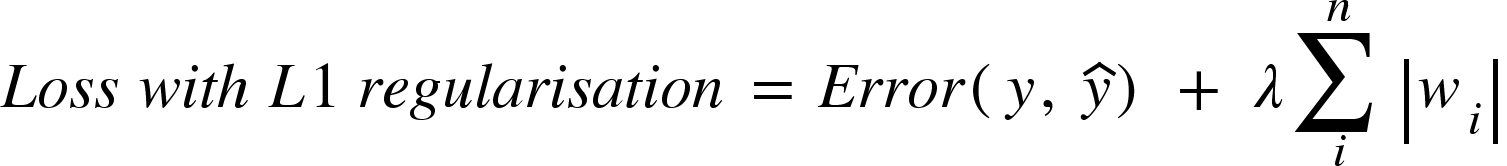

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

##### Elastic Net Regression
This is simply a combination of the L1 and L2 penalties from ridge and lasso regression. This method arose from the need to overcome the limitations of lasso regression. It regularizes and performs feature selection simultaneously by initially finding the optimal values of the coefficients as in ridge then performs a shrinkage.

In [42]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.0001)
regr.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09548138238155612, tolerance: 0.003944969110754325
  positive)


ElasticNet(alpha=0.0001)

In [43]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
elastic_weights_df = get_weights_df(regr, x_train, 'elastic_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elastic_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight,elastic_weight
0,interaction,-3.927464,-0.103096,-0.000000,-0.532100
1,Orientation,0.004875,0.003424,0.000000,0.003244
2,Glazing_Area_Distribution,0.028194,0.029159,0.021431,0.028070
3,Glazing_Area,0.213836,0.212566,0.206132,0.214270
4,Wall_Area,0.710478,0.107246,0.200089,0.100439
5,Roof_Area,0.741856,-0.170320,-0.000000,-0.187816
6,Surface_Area,0.970837,-0.065180,0.000000,-0.000000
7,Overall_Height,2.789104,0.490154,0.463480,0.726931
8,Relative_Compactness,3.481735,-0.235348,-0.027715,-0.000000


### Non-Linear Regression Methods and Other Recommendations

##### Model Tuning and choosing parameters
Machine learning models are parameterized such that there has to be a search for the combination of parameters that will result in the optimal performance of the model. The parameters that define the model architecture are referred to as hyperparameters while the process of exploring a range of values is called hyperparameter tuning. It is important to note the distinction between model parameters and hyperparameters. Unlike hyperparameters, model parameters are learnt during the training phase while setting hyperparameters is exclusive of the training process. Ideally, when hyperparameter tuning is completed, the result is the best parameters for the model. Grid search and random search are two common strategies for tuning hyperparameters. 

##### Grid Search
Grid search explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model with the best result selected and its corresponding parameters. While it is computationally expensive, setting up a grid search is quite easy.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
#let create values or parametres we want to run grid search on. Let run on alpha as use in this tutorial
alpha = [0.0001, 0.00015, 0.00016, 0.0002, 0.001, 0.003]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
Grid = GridSearchCV(estimator=ElasticNet(max_iter=100000), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = Grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

#i used elasticnet as my estimator since it has been determines ast themost efficient, getting alpha for
#the others can be done using this procedure or randomly, they probably already did this in the note
# if you want to try for the other estimators research theparameters bedacuse 
#it will change e.g L1_ratio is specidic to elastic net


Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   29.5s finished


Best Score:  0.9238538490226578
Best Params:  {'alpha': 0.0001, 'l1_ratio': 0.1}


##### Random Search
As opposed to grid search, random search randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.
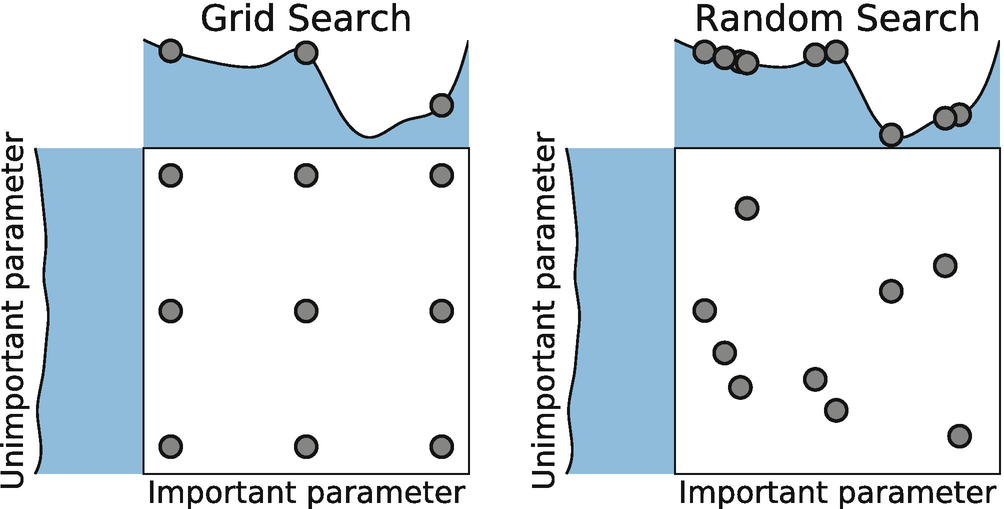

In [45]:
from sklearn.model_selection import RandomizedSearchCV

l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
alpha = [0.0001, 0.003, 0.00015, 0.00016, 0.0002, 0.001, 0.003] #searches values randomly among these
max_iter=100000

param_dist = dict(l1_ratio=l1_ratio,alpha=alpha)

Random_search = RandomizedSearchCV(estimator=ElasticNet(max_iter=100000),param_distributions = param_dist,random_state=0)
result = Random_search.fit(x_train, y_train)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2075207578295004, tolerance: 0.0031462708831570263
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1735619397904722, tolerance: 0.0032101700982193095
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2203275475429383, tolerance: 0.0031758795041326245
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Best Score:  0.9234579348913737
Best Params:  {'l1_ratio': 0, 'alpha': 0.00016}


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.483156346140658, tolerance: 0.003944969110754325
  positive)


###### As regards the above warning, i tried increasing max_iter to 1billion still we got same result as we have now. 

##### Data splitting, resampling and cross validation strategy
Data splitting in data science involves setting aside a portion of the dataset for testing (out of sample or hold-out) and evaluating the performance of the model to provide unbiased results while the rest is used in fitting the model. The proportion of division is solely based on choice and sometimes, the size of the dataset. However a common practice is to split the dataset into training, validation or dev and testing sets where the validation set is used to tune the hyperparameters to select the best values for the model. Resampling involves repeatedly selecting samples from the original dataset and using these samples to obtain more information about the model. This can create different samples of the training set and another for evaluation. Cross validation is a method used to generalise and prevent overfitting in machine learning

#### Let work on adjusted r-squared values to see the result